<a href="https://colab.research.google.com/github/JAEJOON-LEE/data_mining/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_1%EC%B0%A8%EB%B0%9C%ED%91%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load necessary libraries

import numpy as np
import pandas as pd
#import tensorflow as tf
#import keras

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기

In [5]:
#load dataset

df = pd.read_csv("/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- 고객 개개인의 금융정보 + Exited: 이탈여부(1이 이탈한 거)

## EDA

In [ ]:
# 요약통계량
df.describe().iloc[:,1:]

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
display(df.info(), df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

(10000, 14)

- shape: (10000, 14)
- 모든 행에 결측치 없음

In [ ]:
# 행번호, 고객ID, 고객이름 칼럼 삭제
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

### 시각화

0    7963
1    2037
Name: Exited, dtype: int64


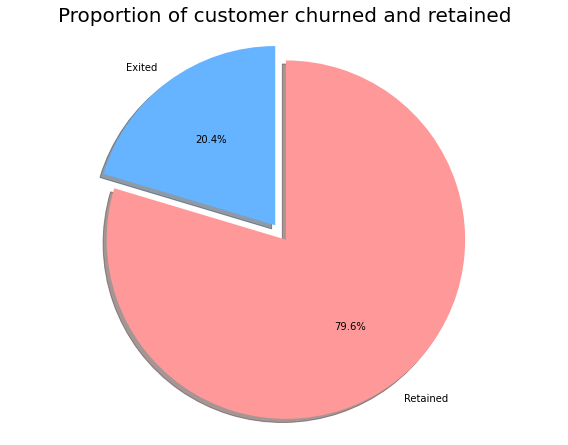

In [9]:
ExitedValues = df.Exited.value_counts()
print(ExitedValues)

labels = 'Exited', 'Retained'
colors = ['#66b3ff', '#ff9999']
sizes = [len(df.loc[df['Exited']==1]), len(df.loc[df['Exited']==0])]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.tight_layout()
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

#### Categorical feature 시각화

- 이탈 고객이 전체의 20%를 차지 -> imbalanced data -> 추후 처리 필요
- 은행입장에서는 보유고객보다는 이탈고객을 정확하게 파악하고 예측하는 게 더 중요

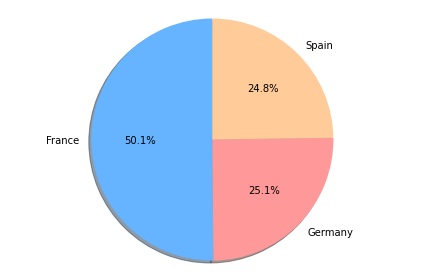

In [10]:
#Geography ratio

Geosplit = df.Geography.value_counts()
Geovalues  = df['Geography'].value_counts().values.tolist()
Geolabels  = df['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 

f2.axis('equal')
plt.tight_layout()
plt.show()

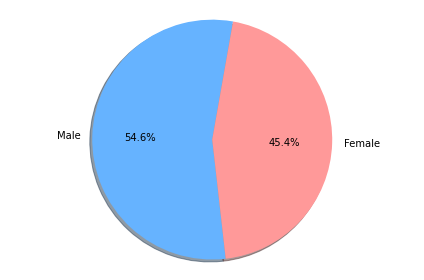

In [11]:
#Gender ratio

Gendervalues  = df['Gender'].value_counts().values.tolist()
GenderLabels = df['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle= 80) 

f3.axis('equal')
plt.tight_layout()
plt.show()

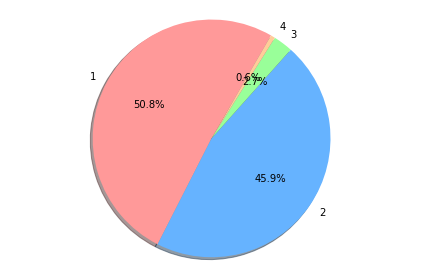

In [12]:
#Number ratio

NumOfProdsvalues  = df['NumOfProducts'].value_counts().values.tolist()
NumOfProdslabels  = df['NumOfProducts'].value_counts().keys().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig4, f4 = plt.subplots()
f4.pie(NumOfProdsvalues ,labels=NumOfProdslabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f4.axis('equal')
plt.tight_layout()
plt.show()

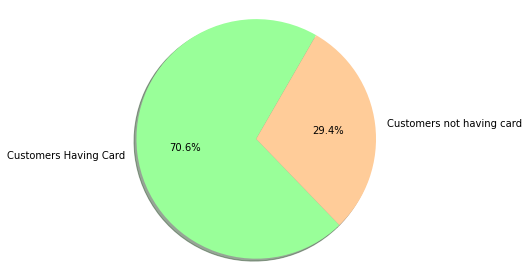

In [13]:
#HasCreditCard ratio

HasCardvalues  = df['HasCrCard'].value_counts().values.tolist()
HasCardlabels  = ["Customers Having Card" , "Customers not having card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f5.axis('equal')
plt.tight_layout()
plt.show()

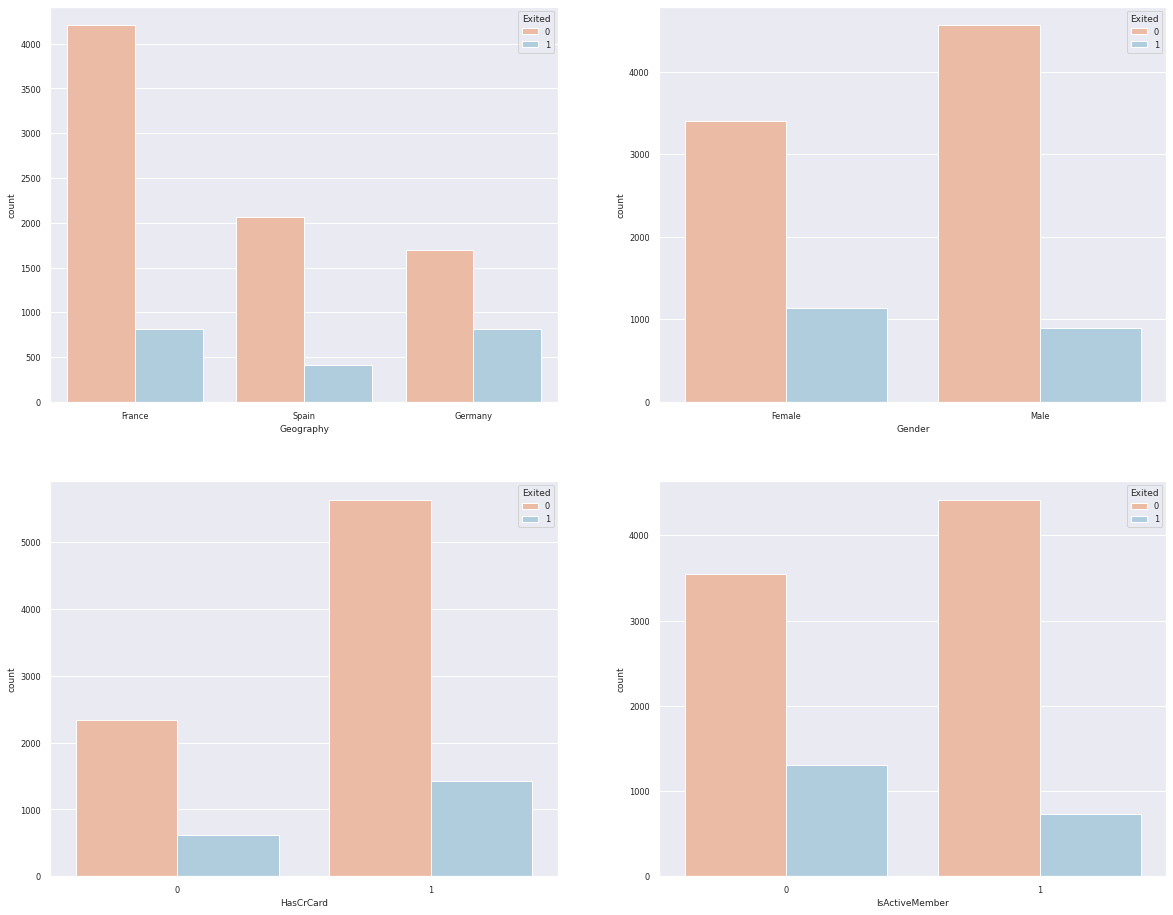

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
plt.subplots_adjust(wspace=0.2)
sns.countplot(x='Geography', palette="RdBu", hue = 'Exited',data = df, ax=ax[0][0])
sns.countplot(x='Gender', palette="RdBu", hue = 'Exited',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', palette="RdBu", hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', palette="RdBu", hue = 'Exited',data = df, ax=ax[1][1])
plt.show()

- Geograpy(국적): 대부분의 국적은 프랑스지만 비율이 적은 독일국적의 고객들의 이탈율이 다른 국가에 비해 높다
- Gender(성별): 여성(Female)이 남성(Male)보다 이탈율이 높다
- HasCrCard(카드소유여부): 이탈고객들은 대부분 신용카드를 가지고 있지만, 거의 모든 고객이 신용카드를 가지고 있기 때문에 큰 정보는 안되는 듯
- IsActiveMember(활동 여부): 활동이 없는 고객의 이탈율이 더 높다

#### numeric feature 시각화

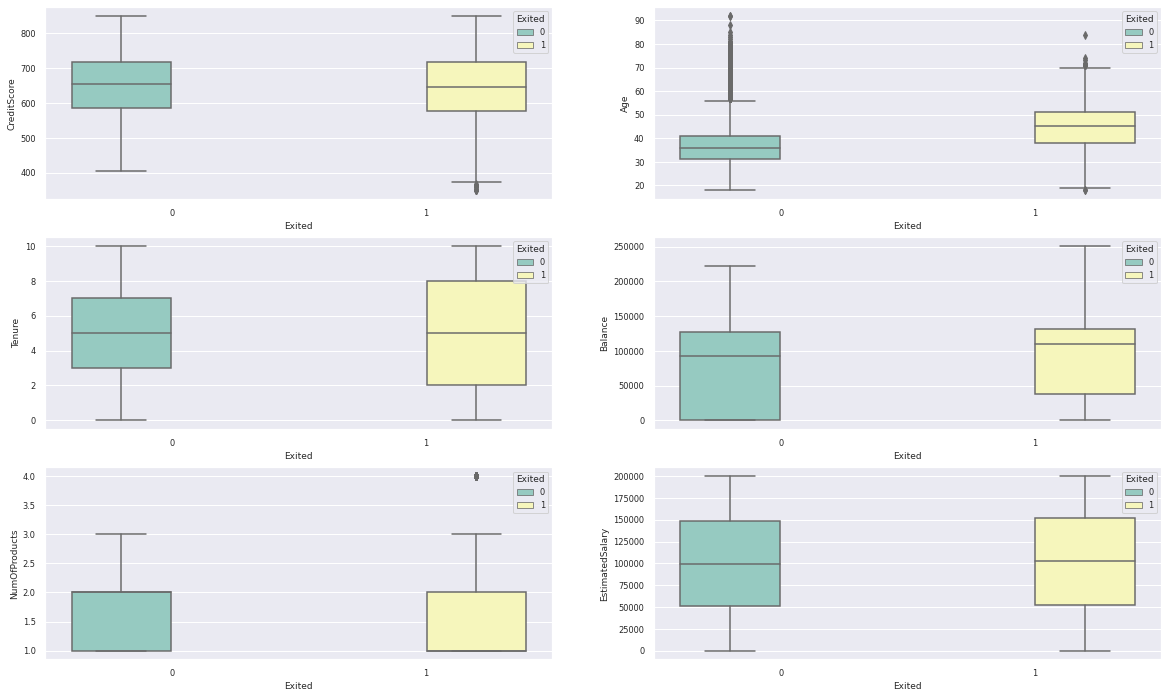

In [40]:
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
plt.subplots_adjust(wspace=0.2)
sns.boxplot(y='CreditScore', palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0])
sns.boxplot(y='Age', palette="Set3", x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1])
sns.boxplot(y='Tenure', palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0])
sns.boxplot(y='Balance', palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1])
plt.show()

- CreditScore: 두 고객 집단 간 신용점수 분포는 큰 차이가 없지만, 이탈 고객에서 신용도가 아주 낮은(이상치) 경우가 많다.
- Age: 대체적으로 연령이 높은 고객들이 이탈율이 높다
- Tenure: 극단의 고객들(은행과 함께한 시간이 아예 적거나 아예 길거나)이 이탈할 가능성이 더 높다.
- Balance(잔고): 비이탈고객들이 더 낮은 분포형태를 가진다
- NumOfProducts: 큰 차이가 없다 -> 이탈에 큰 영향을 미치지 않는다
- EstimatedSalary: 큰 차이가 없다 -> 이탈에 큰 영향을 미치지 않는다

#### 히스토그램

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c1c24d910>,
      dtype=object)

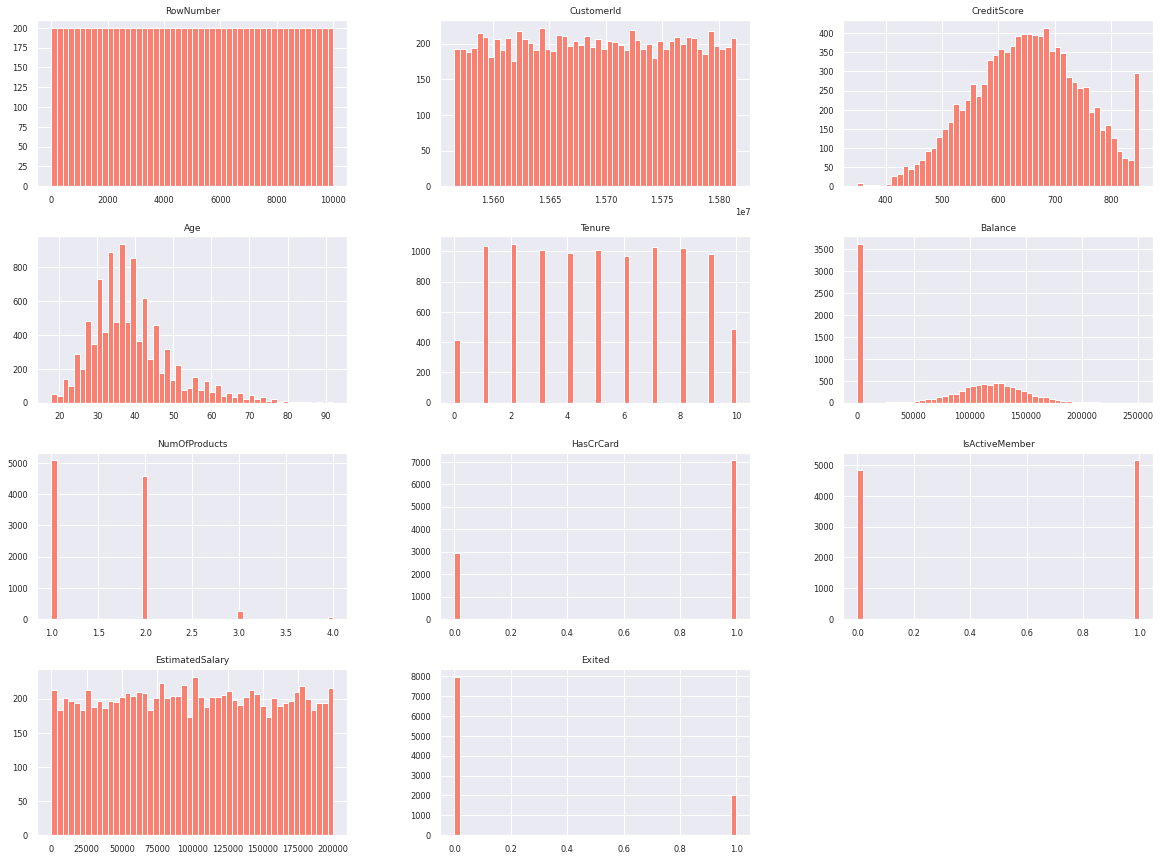

In [56]:
df.hist(bins=50, color="salmon", figsize=(20,15))

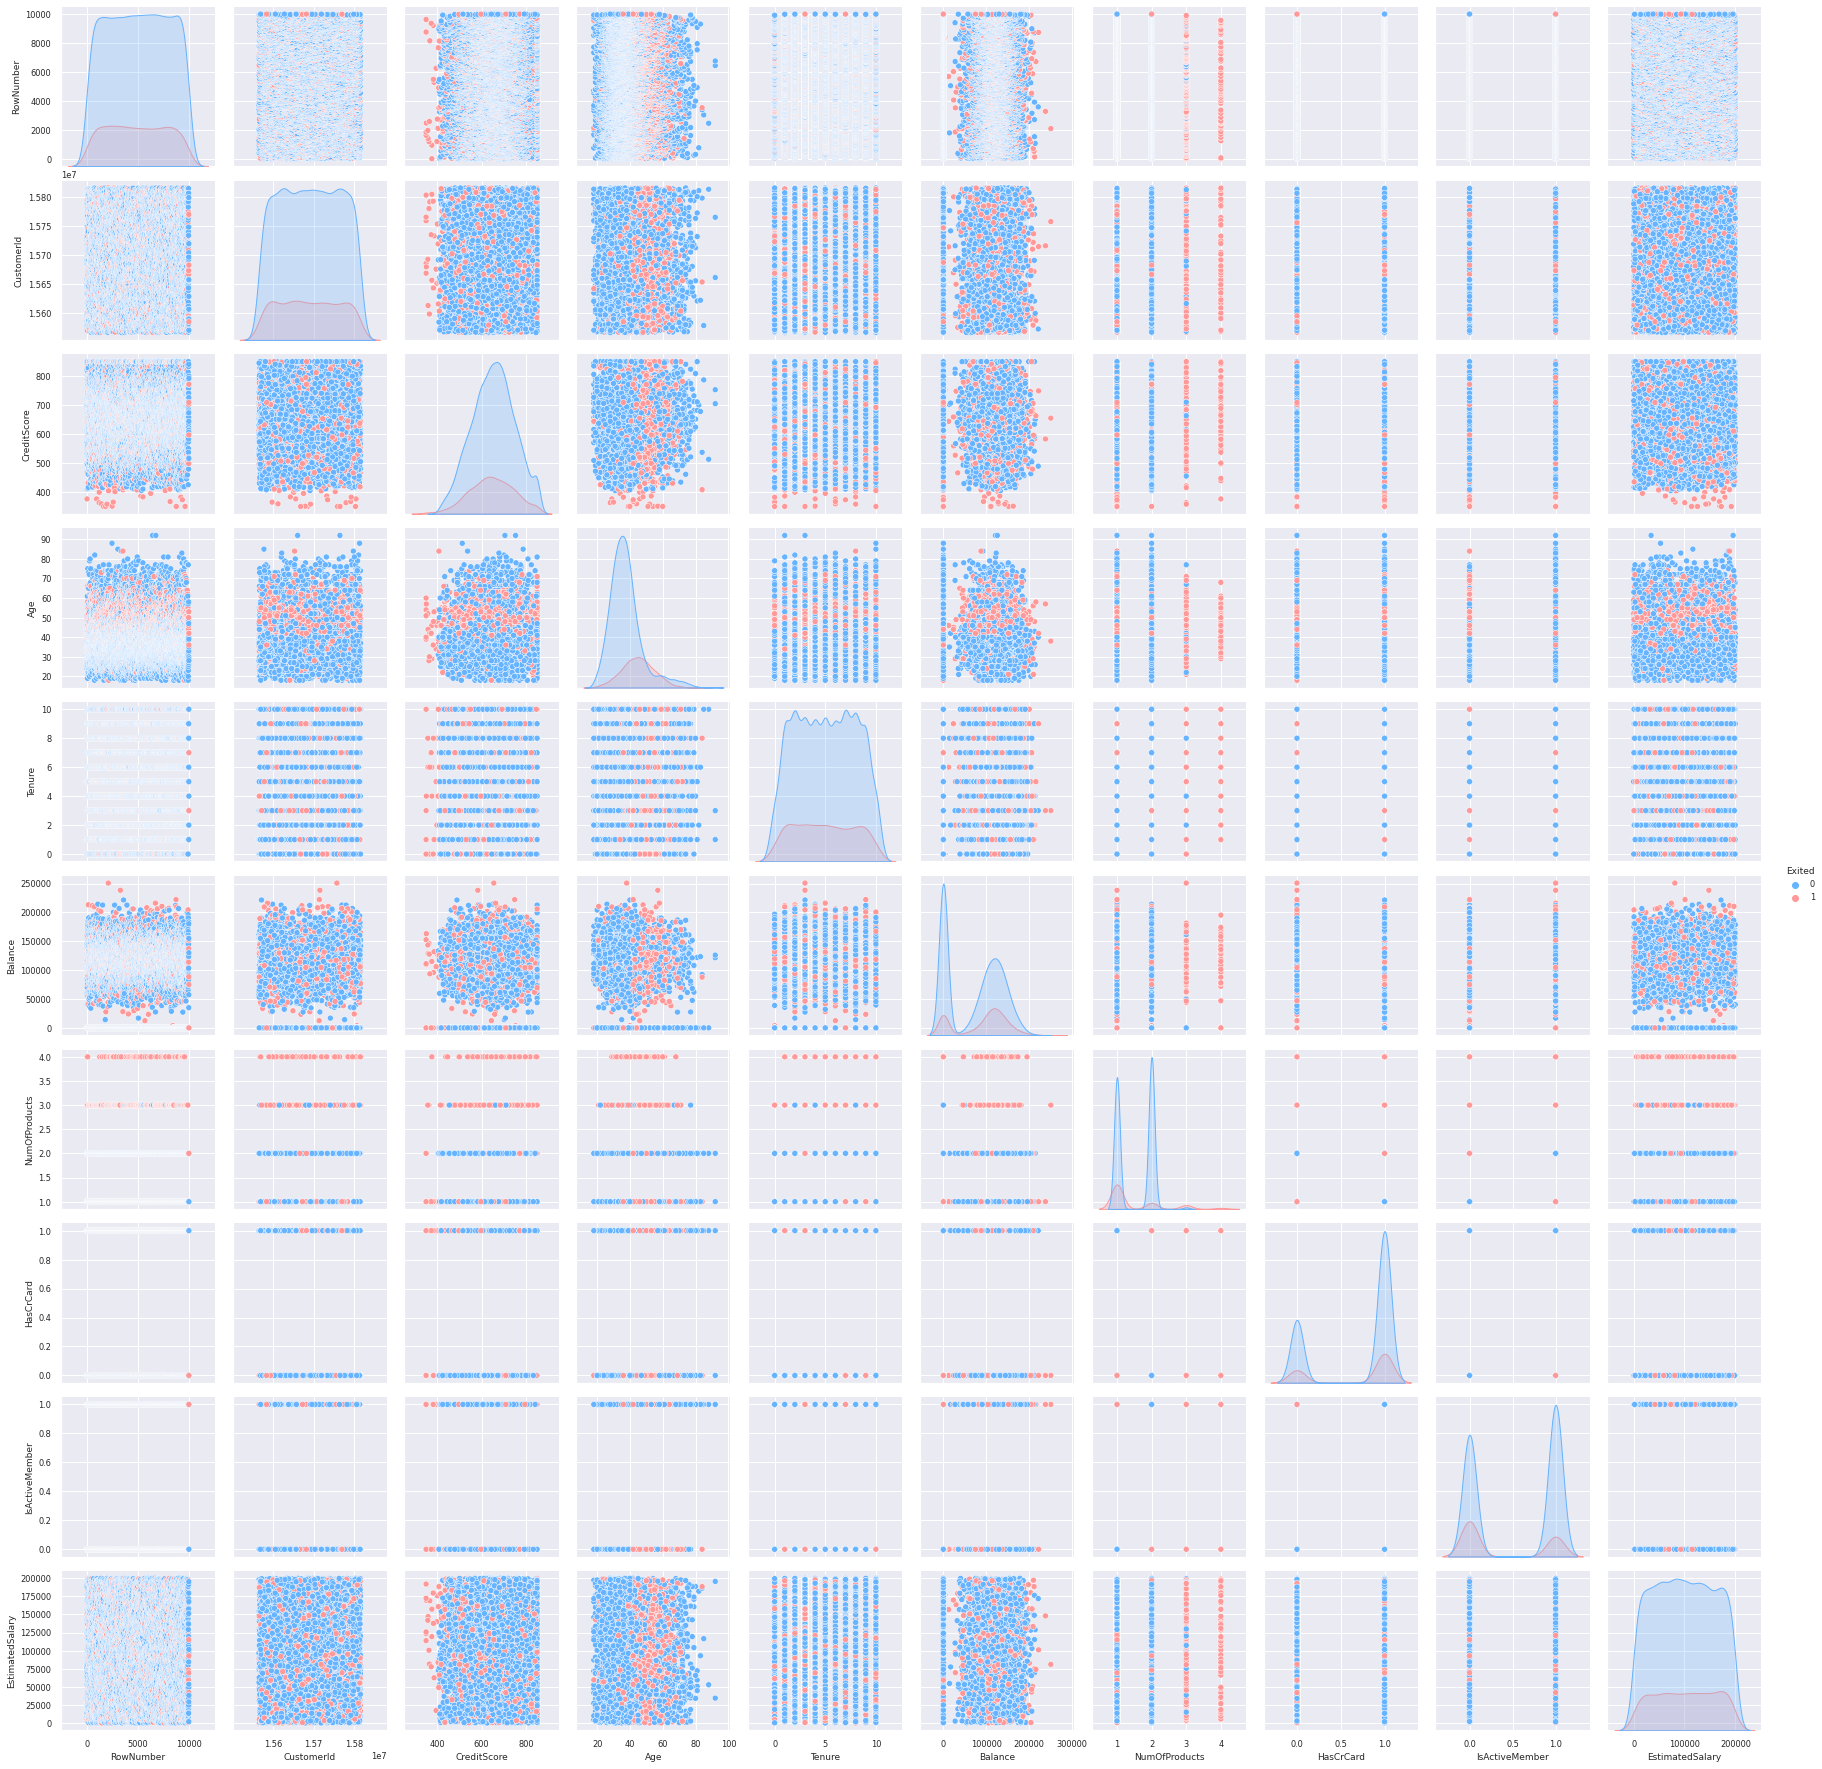

In [58]:
colors = ['#66b3ff', '#ff9999']
sns.pairplot(df, palette = sns.color_palette(colors), hue = 'Exited')

In [19]:
#상관계수

df[df.columns].corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


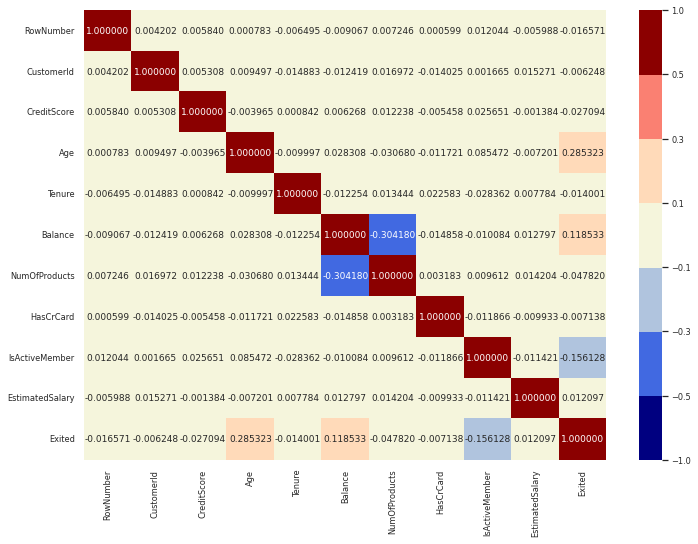

In [50]:
#히트맵
from matplotlib import colors

cmap = colors.ListedColormap(["navy", "royalblue", "lightsteelblue", "beige", "peachpuff", "salmon", "darkred"])
bounds = [-1, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(df.corr(), annot = True, fmt = ".6f", cmap=cmap, norm=norm, cbar=True, ax=ax, cbar_kws=dict(ticks=[-1, -0.5, -0.3, -0.1, +0.1, +0.3, +0.5, +1]))
plt.show()